## Dataset ===>> https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("./../data/raw/Mall Customer Segmentation/Mall_Customers.csv")

In [3]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


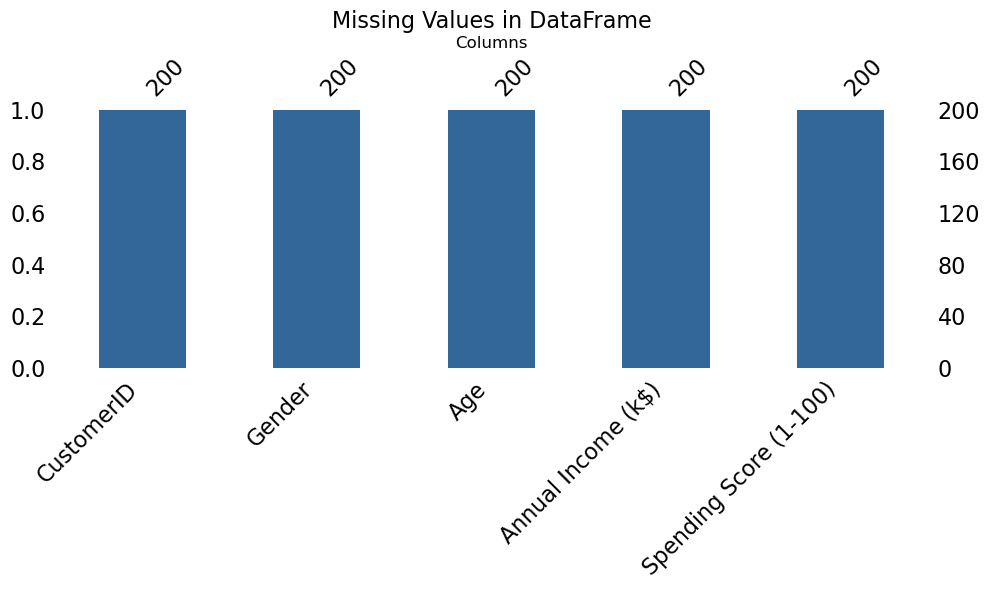

In [6]:
import missingno as msno

# Visualize missing values in the dataframe with improvements
msno.bar(data, color=(0.2, 0.4, 0.6), figsize=(10, 6))
plt.title('Missing Values in DataFrame', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Data', fontsize=12)
plt.tight_layout()
plt.show()


In [7]:
# dropping useless column

data.drop('CustomerID', axis = 1, inplace = True)

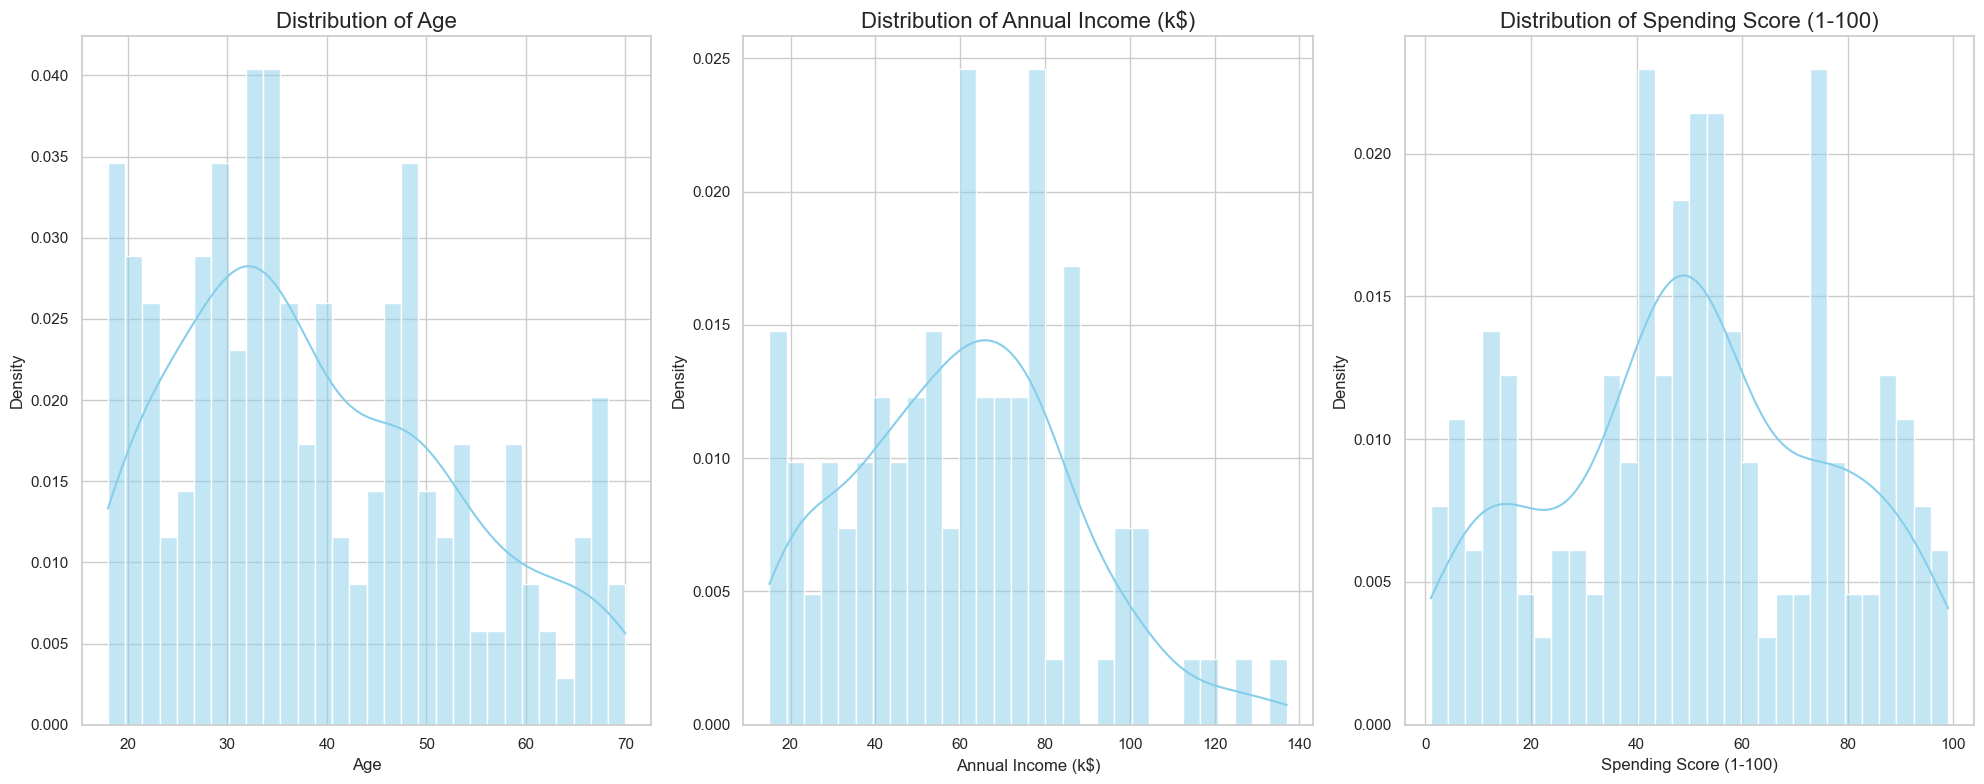

In [8]:
# Set the style of the plot
sns.set(style="whitegrid")

# Initialize the figure with a specific size
plt.figure(figsize=(20, 8))

# Define columns to plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create the distribution plots for each column
for plotnumber, col in enumerate(columns, start=1):
    ax = plt.subplot(1, 3, plotnumber)
    sns.histplot(data[col], kde=True, color='skyblue', bins=30, stat='density')
    ax.set_title(f'Distribution of {col}', fontsize=16)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


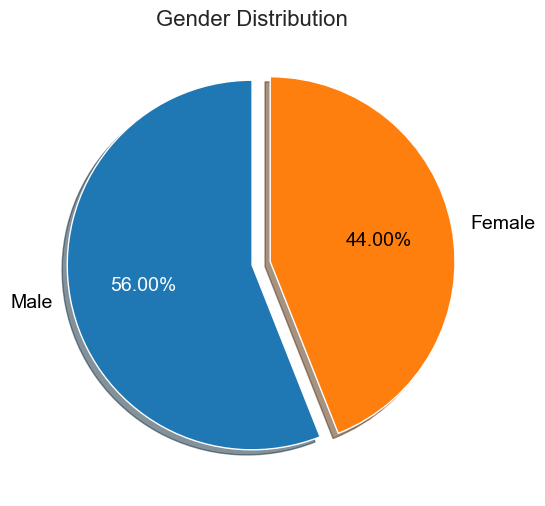

In [10]:
# Calculate the value counts for 'Gender' and define the labels
values = data['Gender'].value_counts()
labels = ['Male', 'Female']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

# Define explode to highlight the 'Female' section
explode = (0, 0.1)

# Create the pie chart with additional improvements
patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=explode, colors=['#1f77b4', '#ff7f0e'])

# Customize text colors and font sizes
plt.setp(texts, color='black', fontsize=14)
plt.setp(autotexts, size=14, color='white')

# Highlight the 'Female' section with a different color for the autopct
autotexts[1].set_color('black')

# Add a title to the pie chart
ax.set_title('Gender Distribution', fontsize=16)

# Display the plot
plt.show()


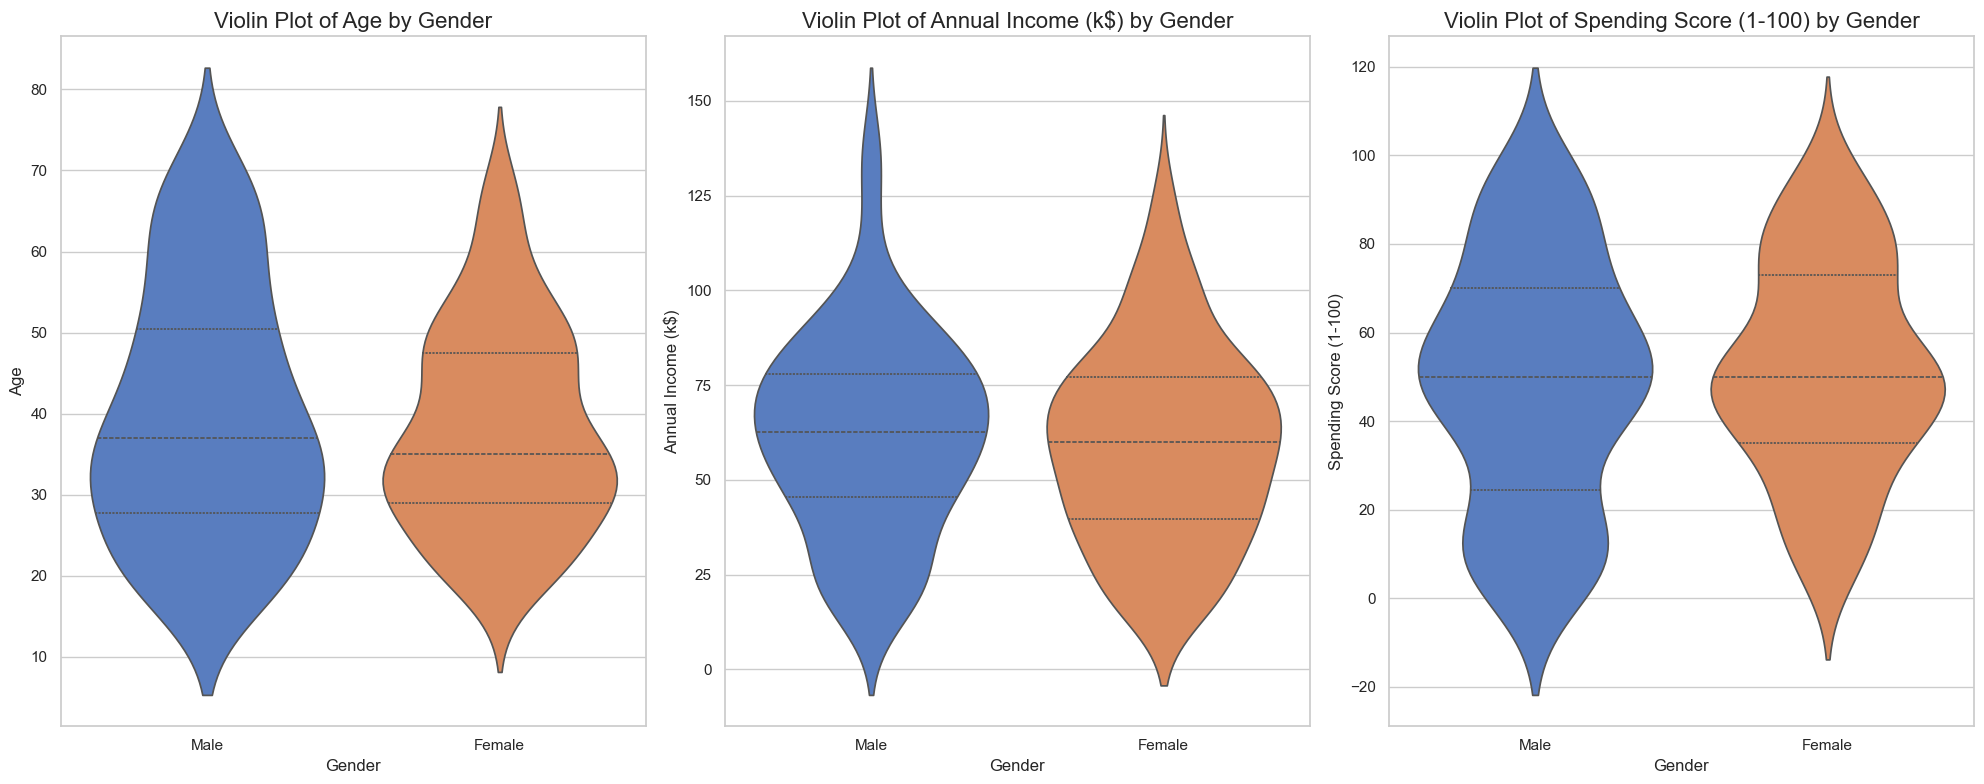

In [11]:
# Set the style for the plots
sns.set(style="whitegrid")

# Initialize the figure with a specific size
plt.figure(figsize=(20, 8))

# Define the columns to plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create the violin plots for each column
for plotnumber, col in enumerate(columns, start=1):
    ax = plt.subplot(1, 3, plotnumber)
    sns.violinplot(x='Gender', y=col, data=data, palette="muted", inner="quart", ax=ax)
    ax.set_title(f'Violin Plot of {col} by Gender', fontsize=16)
    ax.set_xlabel('Gender', fontsize=12)
    ax.set_ylabel(col, fontsize=12)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


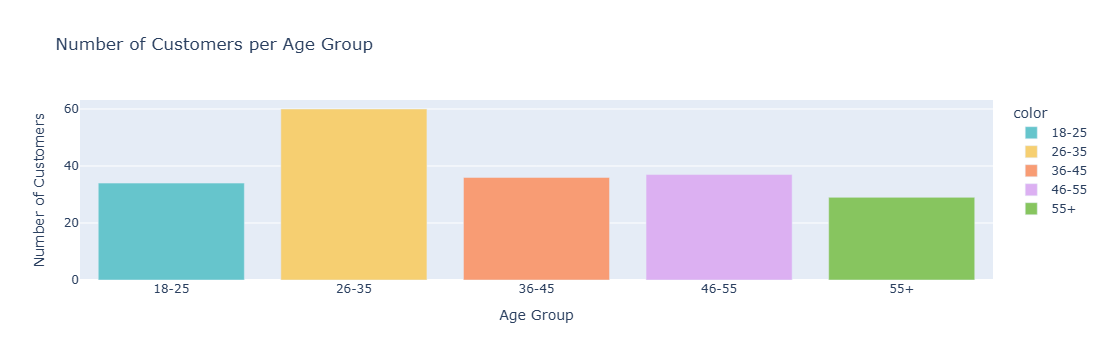

In [13]:
import plotly.express as px

# Define age bins and labels
age_bins = [18, 25, 35, 45, 55, float('inf')]
age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']

# Create a new column in the dataframe for age groups
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=True)

# Calculate the number of customers per age group
age_group_counts = data['Age Group'].value_counts().sort_index()

# Plot the bar chart
fig = px.bar(
    x=age_group_counts.index,
    y=age_group_counts.values,
    color=age_group_counts.index,
    labels={'x': 'Age Group', 'y': 'Number of Customers'},
    title='Number of Customers per Age Group',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Show the plot
fig.show()


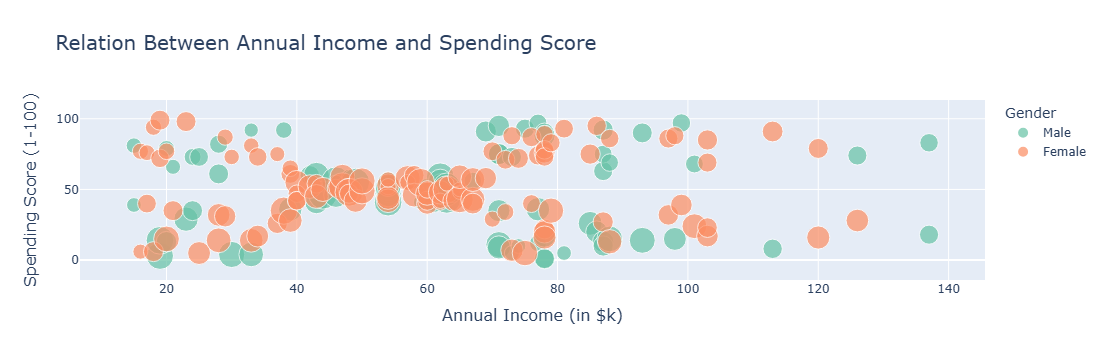

In [14]:
import plotly.express as px

# Create a scatter plot with improved visuals
fig = px.scatter(
    data_frame=data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    color='Gender',
    size='Age',
    hover_data=['Age', 'Gender'],
    title='Relation Between Annual Income and Spending Score',
    labels={
        'Annual Income (k$)': 'Annual Income (in $k)',
        'Spending Score (1-100)': 'Spending Score (1-100)'
    },
    color_discrete_sequence=px.colors.qualitative.Set2  # Custom color palette
)

# Customize layout for better readability
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend_title='Gender',
    legend_title_font_size=14,
    legend_font_size=12
)

# Show the plot
fig.show()


There is no relation between the customers having annual income in the range of 20-40k and 80-140k but there is relation between customers who have annual income in the range of 40-60k.

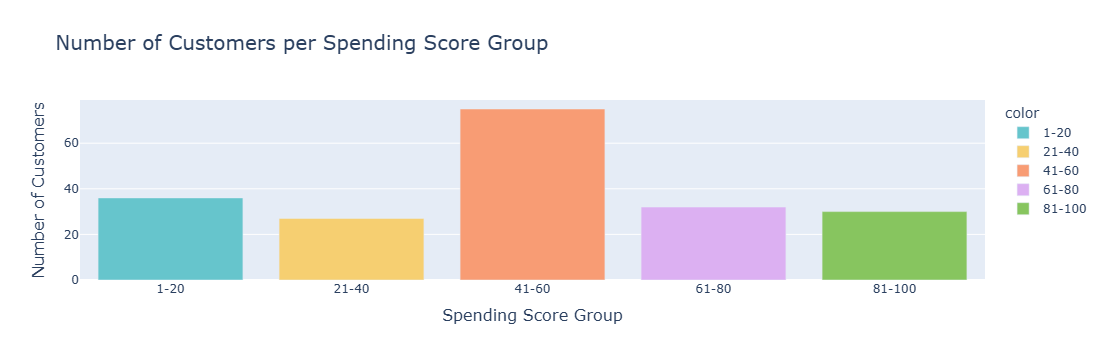

In [15]:
# Define spending score bins and labels
spending_bins = [0, 20, 40, 60, 80, 100]
spending_labels = ['1-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column for spending score groups
data['Spending Score Group'] = pd.cut(data['Spending Score (1-100)'], bins=spending_bins, labels=spending_labels, right=True)

# Calculate the number of customers in each spending score group
spending_score_counts = data['Spending Score Group'].value_counts().sort_index()

# Plot the bar chart
fig = px.bar(
    x=spending_score_counts.index,
    y=spending_score_counts.values,
    color=spending_score_counts.index,
    labels={'x': 'Spending Score Group', 'y': 'Number of Customers'},
    title='Number of Customers per Spending Score Group',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Customize layout for better readability
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
)

# Show the plot
fig.show()


Most of the customers spending score is between 41-60k.

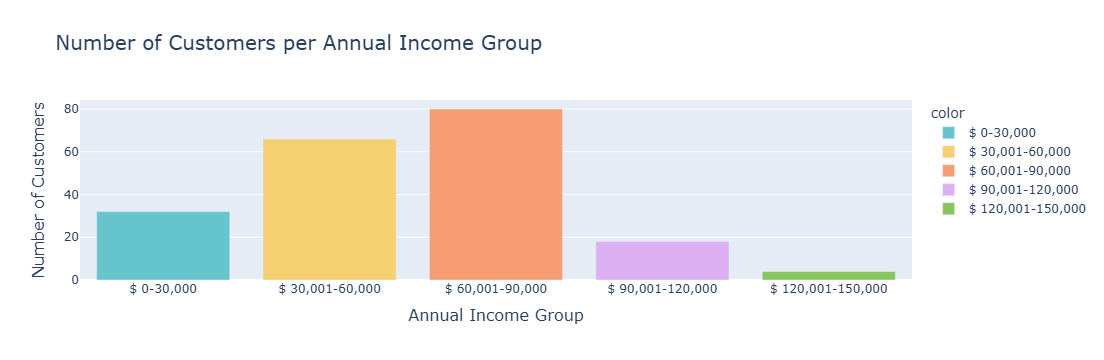

In [16]:
# Define annual income bins and labels
income_bins = [0, 30, 60, 90, 120, 150]
income_labels = ['$ 0-30,000', '$ 30,001-60,000', '$ 60,001-90,000', '$ 90,001-120,000', '$ 120,001-150,000']

# Create a new column for annual income groups
data['Annual Income Group'] = pd.cut(data['Annual Income (k$)'], bins=income_bins, labels=income_labels, right=True)

# Calculate the number of customers in each income group
income_group_counts = data['Annual Income Group'].value_counts().sort_index()

# Plot the bar chart
fig = px.bar(
    x=income_group_counts.index,
    y=income_group_counts.values,
    color=income_group_counts.index,
    labels={'x': 'Annual Income Group', 'y': 'Number of Customers'},
    title='Number of Customers per Annual Income Group',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Customize layout for better readability
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
)

# Show the plot
fig.show()


Most of the customers annual income lies between 60k-90k.

## K-Means

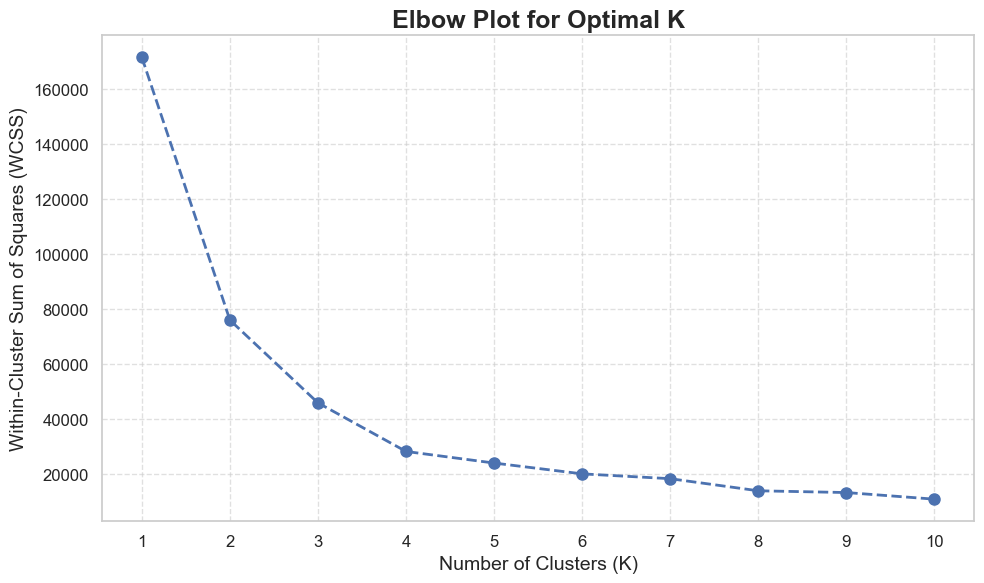

In [17]:
from sklearn.cluster import KMeans

# Extract the relevant features
X1 = data[['Age', 'Spending Score (1-100)']].values

# Calculate WCSS (Within-Cluster Sum of Squares) for k values from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 11),
    wcss,
    marker='o',
    linestyle='--',
    color='b',
    linewidth=2,
    markersize=8,
)
plt.title('Elbow Plot for Optimal K', fontsize=18, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)
plt.xticks(np.arange(1, 11, step=1), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [18]:
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fit the model and predict cluster labels
labels = kmeans.fit_predict(X1)

# Display the cluster labels for each data point
print("Cluster Labels:")
print(pd.Series(labels))


Cluster Labels:
0      3
1      1
2      2
3      1
4      3
      ..
195    1
196    2
197    1
198    2
199    1
Length: 200, dtype: int32


In [19]:
# Display the cluster centers
print("\nCluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Spending Score (1-100)']))


Cluster Centers:
         Age  Spending Score (1-100)
0  55.708333               48.229167
1  30.175439               82.350877
2  43.291667               15.020833
3  27.617021               49.148936


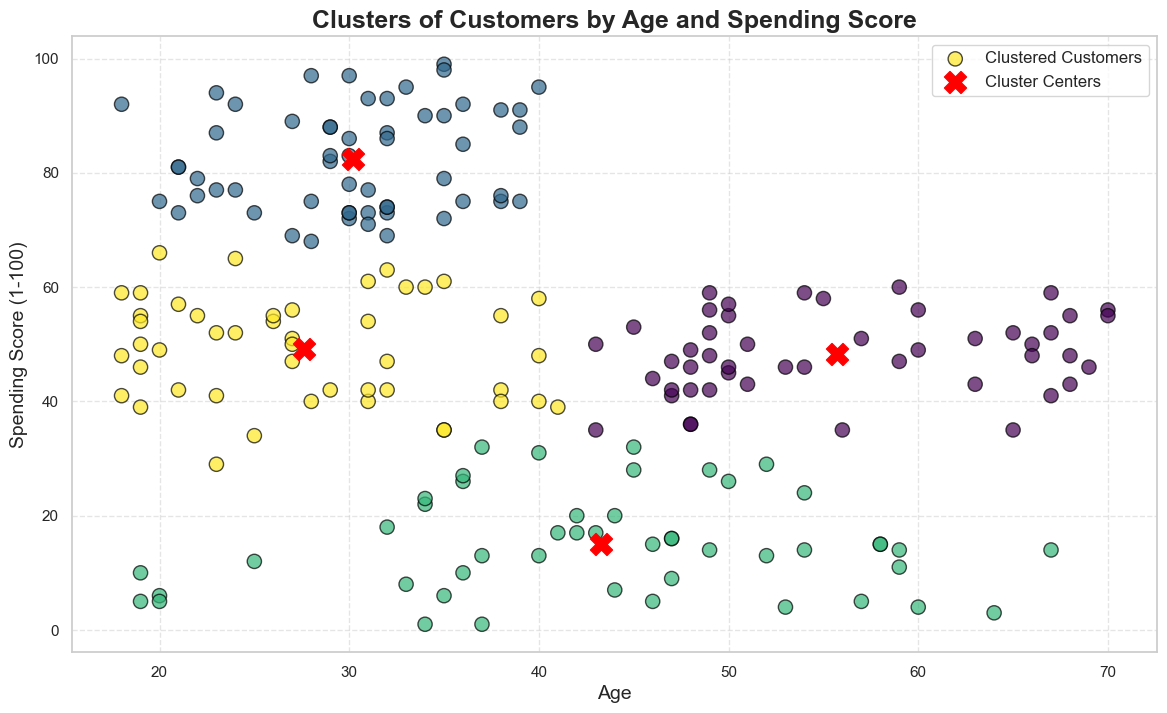

In [20]:
# Set up the plot with a larger size and improved readability
plt.figure(figsize=(14, 8))

# Scatter plot of the data points, color-coded by cluster
plt.scatter(
    X1[:, 0], X1[:, 1], 
    c=kmeans.labels_, 
    cmap='viridis', 
    s=105, 
    edgecolor='black', 
    alpha=0.7, 
    label='Clustered Customers'
)

# Scatter plot of the cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    color='red', 
    marker='X', 
    s=250, 
    label='Cluster Centers'
)

# Add plot title and labels
plt.title('Clusters of Customers by Age and Spending Score', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

# Add grid and legend for better visual guidance
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', fontsize=12)

# Display the plot
plt.show()


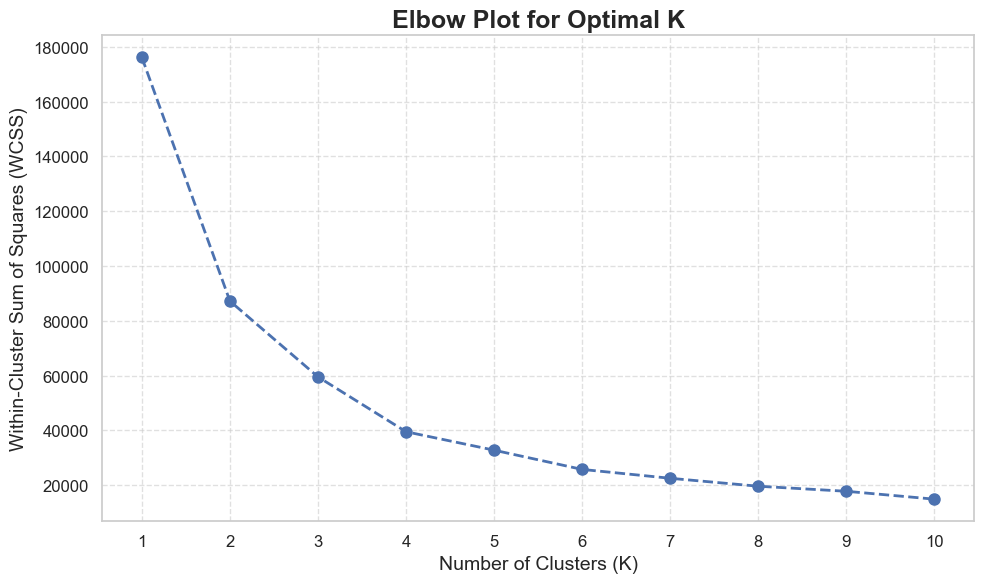

In [21]:
# Extract the relevant features
X2 = data[['Age', 'Annual Income (k$)']].values

# Calculate WCSS (Within-Cluster Sum of Squares) for k values from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 11),
    wcss,
    marker='o',
    linestyle='--',
    color='b',
    linewidth=2,
    markersize=8,
)
plt.title('Elbow Plot for Optimal K', fontsize=18, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)
plt.xticks(np.arange(1, 11, step=1), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [22]:
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fit the model and predict cluster labels
labels = kmeans.fit_predict(X2)

# Display the cluster labels for each data point
print("Cluster Labels:")
print(pd.Series(labels))

Cluster Labels:
0      2
1      2
2      2
3      2
4      2
      ..
195    3
196    3
197    3
198    3
199    3
Length: 200, dtype: int32


In [23]:
# Display the cluster centers
print("\nCluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)']))


Cluster Centers:
         Age  Annual Income (k$)
0  55.660714           51.017857
1  31.958904           72.958904
2  29.446809           29.212766
3  39.000000          106.500000


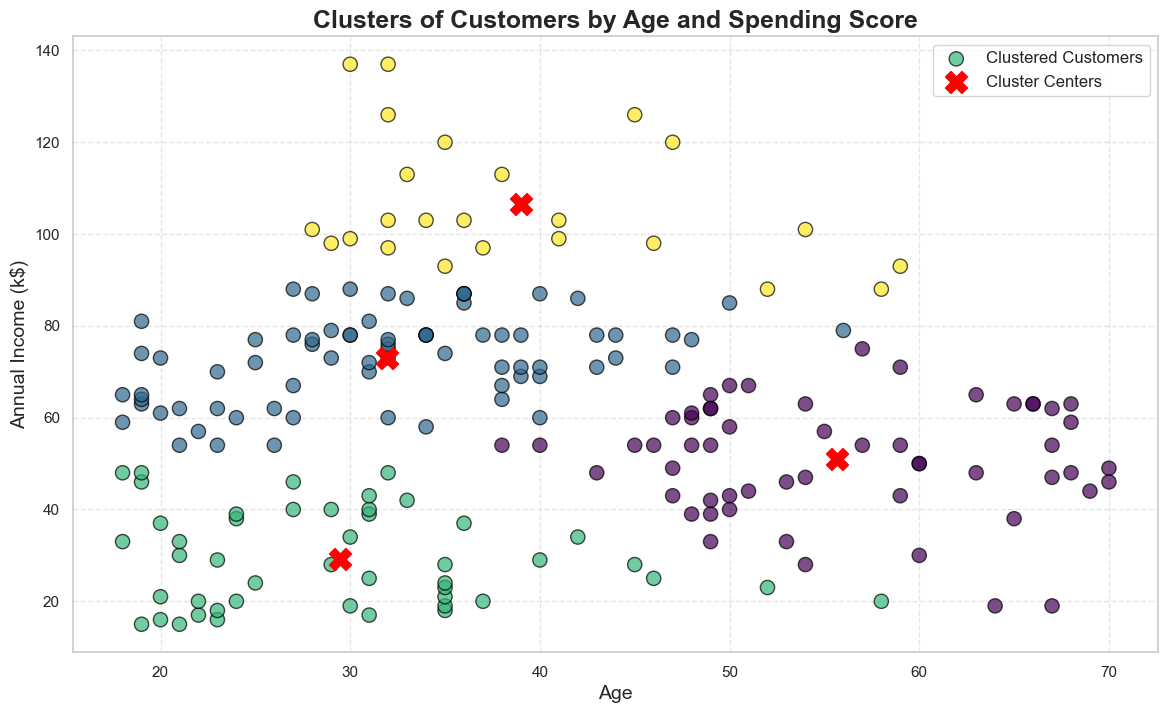

In [24]:
# Set up the plot with a larger size and improved readability
plt.figure(figsize=(14, 8))

# Scatter plot of the data points, color-coded by cluster
plt.scatter(
    X2[:, 0], X2[:, 1], 
    c=kmeans.labels_, 
    cmap='viridis', 
    s=105, 
    edgecolor='black', 
    alpha=0.7, 
    label='Clustered Customers'
)

# Scatter plot of the cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    color='red', 
    marker='X', 
    s=250, 
    label='Cluster Centers'
)

# Add plot title and labels
plt.title('Clusters of Customers by Age and Spending Score', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Annual Income (k$)', fontsize=14)

# Add grid and legend for better visual guidance
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', fontsize=12)

# Display the plot
plt.show()

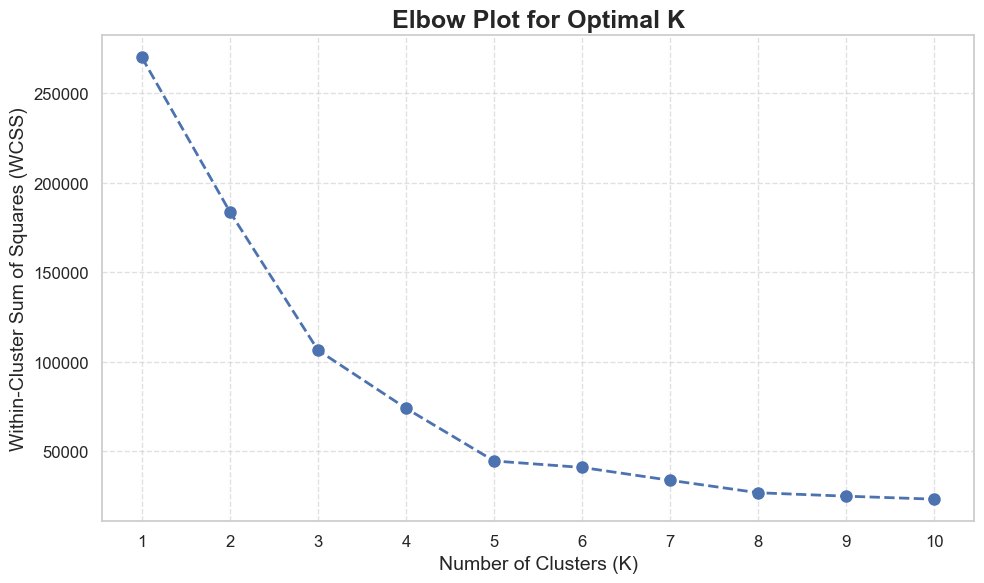

In [25]:
# Extract the relevant features
X3 = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Calculate WCSS (Within-Cluster Sum of Squares) for k values from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 11),
    wcss,
    marker='o',
    linestyle='--',
    color='b',
    linewidth=2,
    markersize=8,
)
plt.title('Elbow Plot for Optimal K', fontsize=18, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)
plt.xticks(np.arange(1, 11, step=1), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [26]:
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fit the model and predict cluster labels
labels = kmeans.fit_predict(X3)

# Display the cluster labels for each data point
print("Cluster Labels:")
print(pd.Series(labels))

Cluster Labels:
0      0
1      2
2      0
3      2
4      0
      ..
195    1
196    3
197    1
198    3
199    1
Length: 200, dtype: int32


In [27]:
# Display the cluster centers
print("\nCluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)']))


Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)
0           48.168317               43.396040
1           86.538462               82.128205
2           25.727273               79.363636
3           87.000000               18.631579


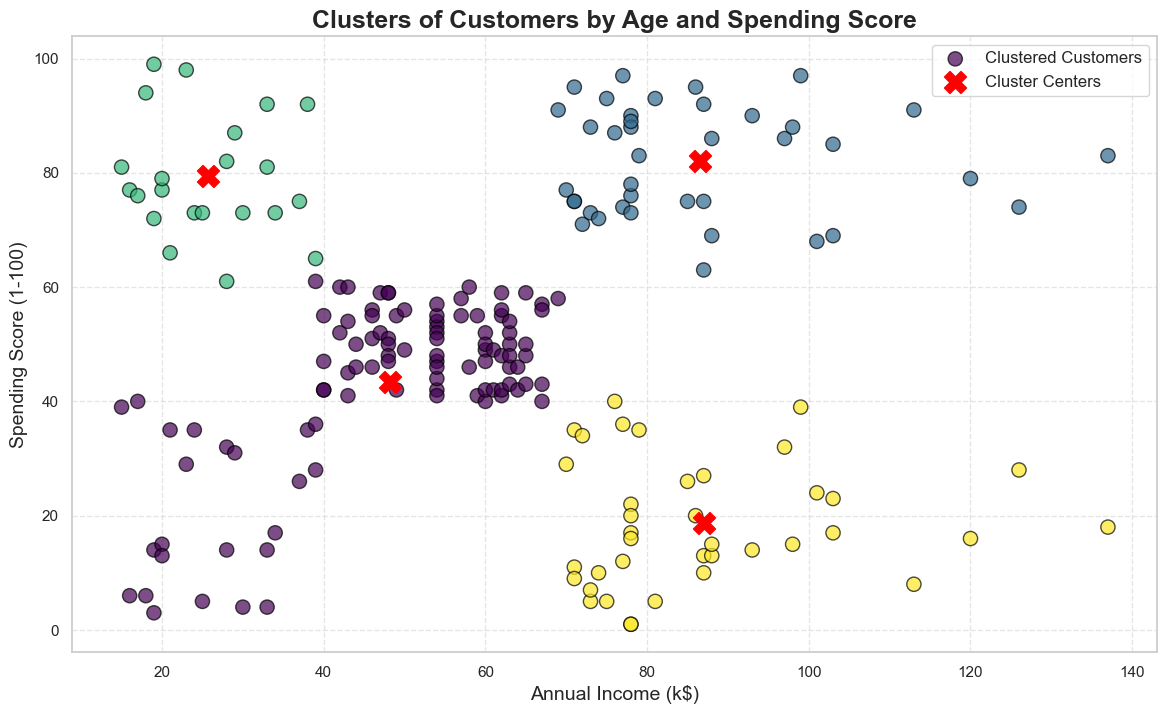

In [28]:
# Set up the plot with a larger size and improved readability
plt.figure(figsize=(14, 8))

# Scatter plot of the data points, color-coded by cluster
plt.scatter(
    X3[:, 0], X3[:, 1], 
    c=kmeans.labels_, 
    cmap='viridis', 
    s=105, 
    edgecolor='black', 
    alpha=0.7, 
    label='Clustered Customers'
)

# Scatter plot of the cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    color='red', 
    marker='X', 
    s=250, 
    label='Cluster Centers'
)

# Add plot title and labels
plt.title('Clusters of Customers by Age and Spending Score', fontsize=18, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

# Add grid and legend for better visual guidance
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best', fontsize=12)

# Display the plot
plt.show()

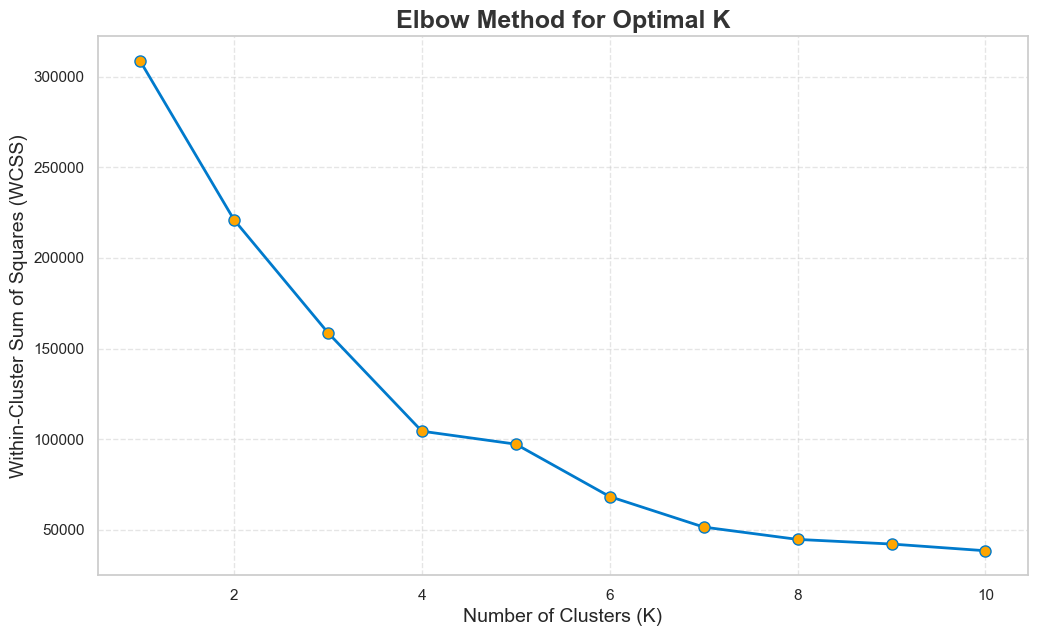

In [31]:
# Ensure that X4 only contains numeric columns
X4 = data.select_dtypes(include=[float, int])

# Check for any missing values in the selected data and handle them (e.g., fill with the mean)
X4 = X4.fillna(X4.mean())

# Calculate WCSS (Within-Cluster Sum of Squares) for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Plot with enhanced visuals
plt.figure(figsize=(12, 7))
plt.plot(
    range(1, 11), 
    wcss, 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    markersize=8, 
    color='#007ACC', 
    markerfacecolor='orange'
)

# Adding plot labels and titles
plt.title('Elbow Method for Optimal K', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()


In [32]:
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fit the model and predict cluster labels
labels = kmeans.fit_predict(X4)

# Display the cluster labels for each data point
print("Cluster Labels:")
print(pd.Series(labels))

Cluster Labels:
0      2
1      2
2      0
3      2
4      0
      ..
195    1
196    3
197    1
198    3
199    1
Length: 200, dtype: int32


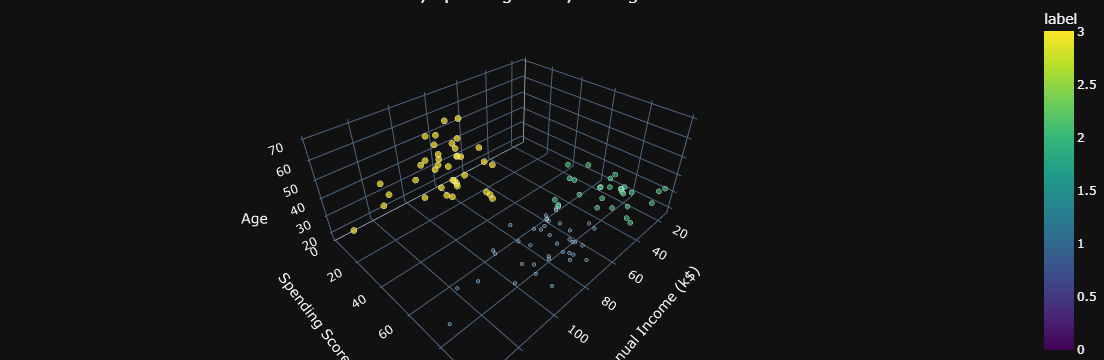

In [34]:
import plotly.express as px

# Assuming X4 contains the necessary columns and 'label' is assigned from clustering
X4['label'] = kmeans.labels_  # Assuming kmeans has been performed and 'labels_' contains cluster assignments

# Create a 3D scatter plot with improvements
fig = px.scatter_3d(X4, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color='label', size='label', 
                    title='3D Scatter Plot: Clusters based on Income, Spending Score, and Age',
                    labels={"Annual Income (k$)": "Annual Income (k$)",
                            "Spending Score (1-100)": "Spending Score (1-100)",
                            "Age": "Age"},
                    color_continuous_scale='Viridis',  # Color scale for better aesthetics
                    size_max=10)  # Limit the size of the markers for better visualization

# Update layout for enhanced presentation
fig.update_layout(
    scene=dict(
        xaxis_title='Annual Income (k$)',
        yaxis_title='Spending Score (1-100)',
        zaxis_title='Age',
        bgcolor='rgba(0, 0, 0, 0)'  # Transparent background for a cleaner look
    ),
    margin=dict(l=0, r=0, b=0, t=0),  # Remove unnecessary margins
    template='plotly_dark'  # Dark theme for better contrast
)

# Show the plot
fig.show()


## Hierarchical Clustering

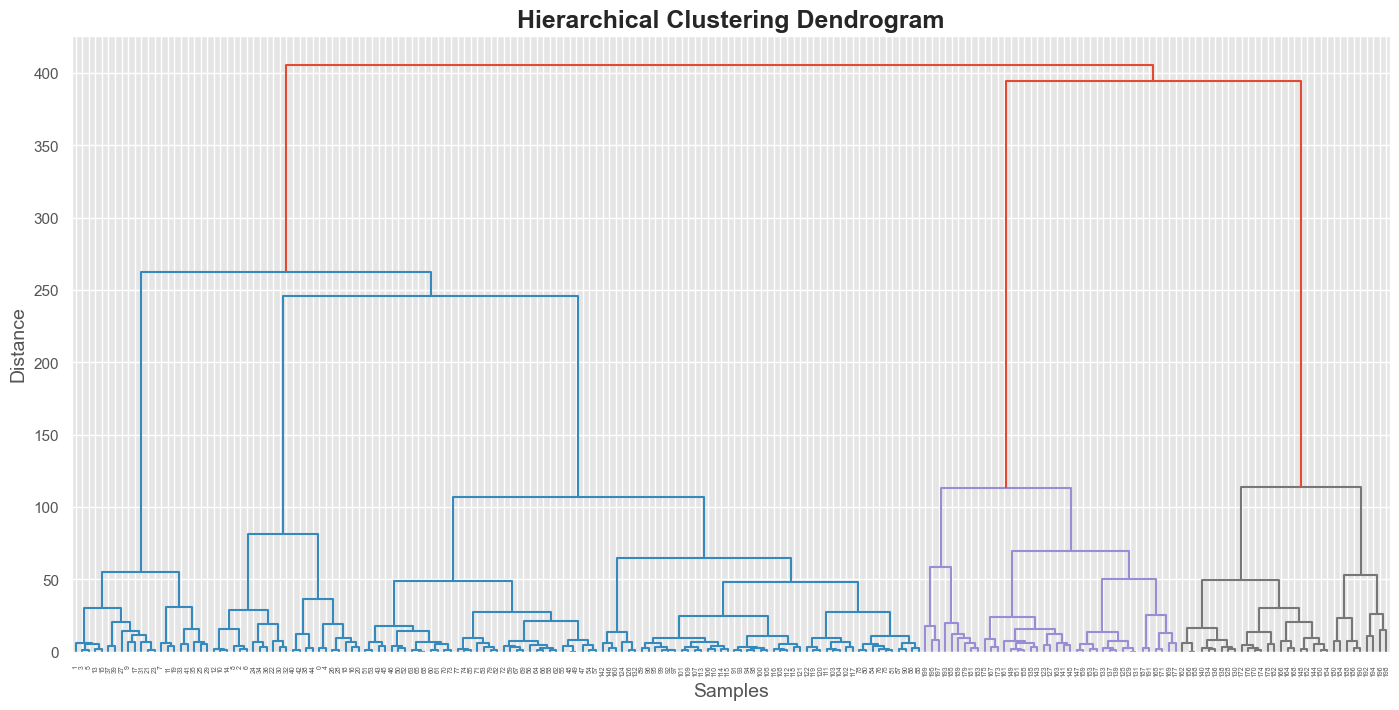

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Set plot style
plt.style.use('ggplot')  # Alternative style

# Create figure with improved size
plt.figure(figsize=(17, 8))

# Create dendrogram with linkage matrix
dendo = dendrogram(linkage(X3, method='ward'))

# Set plot title with larger font
plt.title('Hierarchical Clustering Dendrogram', fontsize=18, weight='bold')

# Label axes
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Distance', fontsize=14)

# Display plot
plt.show()


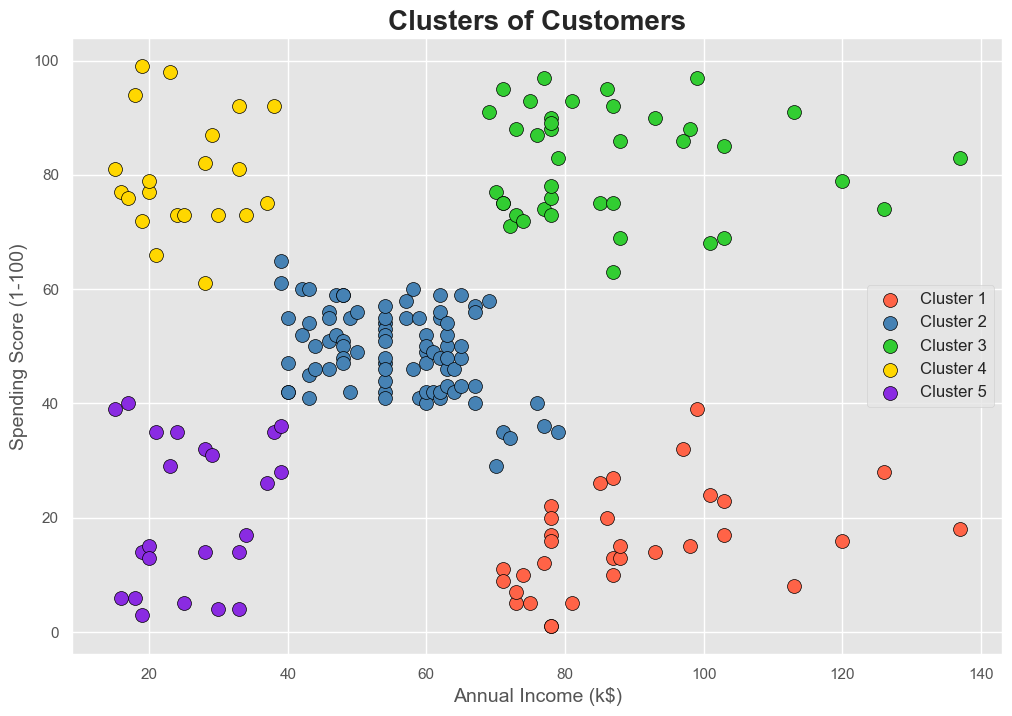

In [38]:
from sklearn.cluster import AgglomerativeClustering

# Fit Agglomerative Clustering model (removed affinity parameter for ward linkage)
agc = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = agc.fit_predict(X3)

# Create a figure with improved size
plt.figure(figsize=(12, 8))

# Define custom colors for clusters
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']

# Plot each cluster with a different color
for i in range(5):
    plt.scatter(X3[labels == i, 0], X3[labels == i, 1], label=f'Cluster {i+1}', 
                s=100, color=colors[i], edgecolor='black', marker='o')

# Add labels, title, and legend
plt.legend(loc='best', fontsize=12)
plt.title('Clusters of Customers', fontsize=20, weight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()


## DBSCAN

In [39]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Define the centers of the blobs
centers = [[1, 1], [-1, -1], [1, -1]]

# Generate synthetic dataset (blobs) with specified number of samples and standard deviation
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=42)

# Standardize features to have zero mean and unit variance
X = StandardScaler().fit_transform(X)

# Optional: Print the shape of the dataset to verify
print(f"Generated data shape: {X.shape}")

# Optional: Verify first few rows of the data
print("First 5 rows of data after scaling:\n", X[:5])


Generated data shape: (750, 2)
First 5 rows of data after scaling:
 [[ 0.34872081 -0.32220309]
 [ 0.4946184   0.97627442]
 [-0.70604499 -0.69988719]
 [-2.04051365 -0.81223347]
 [ 0.7535968   1.24052039]]


In [40]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering with specified parameters
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# Create a boolean mask indicating the core samples (True for core samples, False otherwise)
core_samples_mask = np.zeros(len(db.labels_), dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Extract the labels from the fitted model
labels = db.labels_

# Optional: Print a summary of the clustering results
print(f"Number of clusters found: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Number of noise points: {list(labels).count(-1)}")


Number of clusters found: 2
Number of noise points: 18


In [41]:
from collections import Counter

# Count the occurrences of labels, including noise (-1)
label_counts = Counter(labels)

# Number of clusters (ignoring noise label -1)
n_clusters_ = len(label_counts) - (1 if -1 in label_counts else 0)

# Number of noise points (label -1 represents noise in DBSCAN)
n_noise_ = label_counts.get(-1, 0)

# Optional: Print the results
print(f"Number of clusters: {n_clusters_}")
print(f"Number of noise points: {n_noise_}")


Number of clusters: 2
Number of noise points: 18


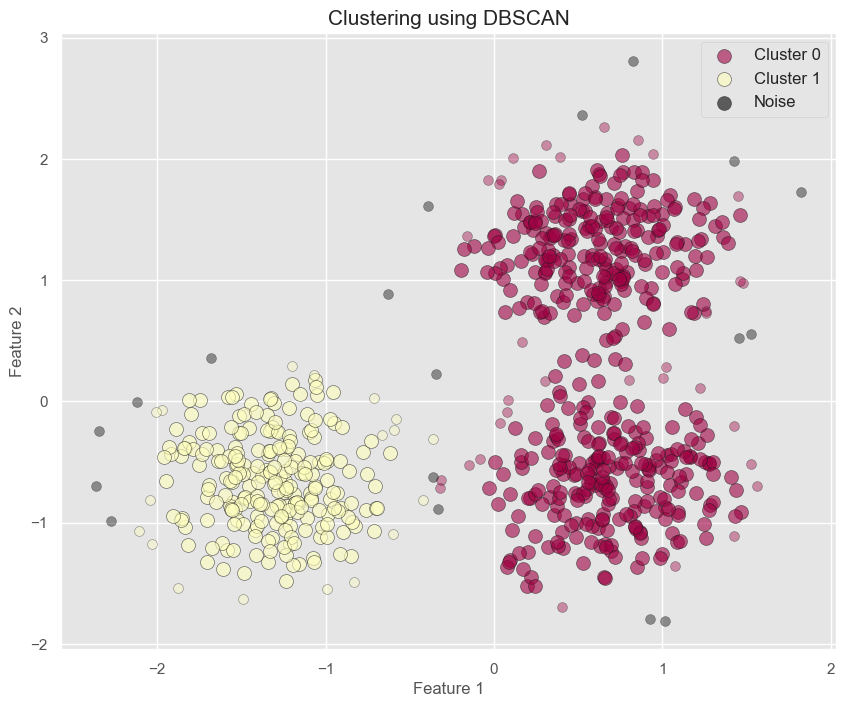

In [42]:
# Define the plot size
plt.figure(figsize=(10, 8))

# Get unique labels (clusters) and define a color map
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Iterate over unique labels to plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Set black for noise points (label -1)
        col = [0, 0, 0, 1]
    
    # Create mask for class members and core samples
    class_member_mask = (labels == k)
    
    # Plot core samples with larger markers
    core_samples = X[class_member_mask & core_samples_mask]
    plt.scatter(core_samples[:, 0], core_samples[:, 1], c=[col], marker='o', edgecolors='k', s=100, label=f'Cluster {k}' if k != -1 else 'Noise', alpha=0.6)
    
    # Plot non-core (border) points with smaller markers
    border_samples = X[class_member_mask & ~core_samples_mask]
    plt.scatter(border_samples[:, 0], border_samples[:, 1], c=[col], marker='o', edgecolors='k', s=50, alpha=0.4)

# Add title, labels, and show plot
plt.title('Clustering using DBSCAN', fontsize=15)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best', fontsize=12)
plt.show()
